In [159]:
# FashionMNIST: https://github.com/zalandoresearch/fashion-mnist


#Label	Description
#0	T-shirt/top
#1	Trouser
#2	Pullover
#3	Dress
#4	Coat
#5	Sandal
#6	Shirt
#7	Sneaker
#8	Bag
#9	Ankle boot

import gzip
import numpy as np


# Daten (bytes) in np array transformieren 
def open_images(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=16)\
            .reshape(-1, 28, 28)\
            .astype(np.float32)


def open_labels(filename):
    with gzip.open(filename, "rb") as file: 
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=8)


X_train = open_images("train-images-idx3-ubyte.gz")
y_train = open_labels("train-labels-idx1-ubyte.gz")

#Set up the the label, which should be detected   
y_train = y_train == 0 

X_test = open_images("t10k-images-idx3-ubyte.gz")
y_test = open_labels("t10k-labels-idx1-ubyte.gz")

y_test = y_test == 0


In [160]:
from keras.models import Sequential 
from keras.layers import Dense 

In [161]:
y_train

array([False,  True,  True, ..., False,  True, False])

In [162]:
model = Sequential()


# Anzahl Eingänge 28x28 zu 784 Tupel formatieren
model.add(Dense(100, activation="sigmoid", input_shape=(784,)))
model.add(Dense(1, activation="sigmoid"))

#sgd: Stochastik gradient decen, loss: binary für 1 Ausgang, metrics: Genauigkeit angeben 
model.compile(optimizer="sgd", loss="binary_crossentropy", metrics=["accuracy"])

In [163]:
#optional print(X_train) & print(X_train[0])
X_train.shape 

(60000, 28, 28)

In [164]:
X_train.reshape(60000, 784)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [165]:
model.fit(
    X_train.reshape(60000, 784),
    y_train,
    epochs=10,
    batch_size=1000)

Epoch 1/10
60000/60000 [==============================] - 1s 12us/step - loss: 0.2775 - accuracy: 0.8827
Epoch 2/10
60000/60000 [==============================] - 0s 8us/step - loss: 0.1842 - accuracy: 0.9269
Epoch 3/10
60000/60000 [==============================] - 1s 9us/step - loss: 0.1597 - accuracy: 0.9455
Epoch 4/10
60000/60000 [==============================] - 1s 9us/step - loss: 0.1461 - accuracy: 0.9502
Epoch 5/10
60000/60000 [==============================] - 1s 9us/step - loss: 0.1373 - accuracy: 0.9526
Epoch 6/10
60000/60000 [==============================] - 1s 10us/step - loss: 0.1309 - accuracy: 0.9536
Epoch 7/10
60000/60000 [==============================] - 1s 11us/step - loss: 0.1267 - accuracy: 0.9544
Epoch 8/10
60000/60000 [==============================] - 1s 10us/step - loss: 0.1233 - accuracy: 0.9550
Epoch 9/10
60000/60000 [==============================] - 1s 10us/step - loss: 0.1204 - accuracy: 0.9554
Epoch 10/10
60000/60000 [==============================] - 

<function matplotlib.pyplot.show(*args, **kw)>

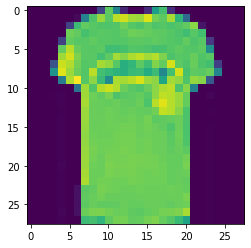

In [166]:
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'


%matplotlib inline 
import matplotlib.pyplot as plt 

plt.imshow(X_test[19])
plt.show 

In [167]:
# predict reshape 28x28 zu 1x784 

In [168]:
model.predict(X_test[19].reshape(1, 784))

array([[0.8522044]], dtype=float32)

In [169]:
####################################################################
#Accuracy ohne metrics
y_test_pred = model.predict(X_test.reshape(-1, 784))

In [170]:
y_test_pred

array([[0.0030402 ],
       [0.01600993],
       [0.01700303],
       ...,
       [0.33404893],
       [0.01332325],
       [0.00295009]], dtype=float32)

In [171]:
#round 0/1
import numpy as pd 

np.round(y_test_pred)

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [172]:
y_test

array([False, False, False, ..., False, False, False])

In [173]:
#Struktur arrays (y_test und np.round(y_test_pred)) angleichen - liste

In [174]:
np.round(y_test_pred).reshape(-1)

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [175]:
np.round(y_test_pred).reshape(-1) == y_test

array([ True,  True,  True, ...,  True,  True,  True])

In [176]:
np.mean(np.round(y_test_pred).reshape(-1) == y_test)

0.9541

In [177]:
####################################################################

In [178]:
# mit keras Genauigkeit ausrechnen  in compile metrics=["accuracy"] 
model.evaluate(X_test.reshape(-1, 784), y_test)

10000/10000 [==============================] - 0s 34us/step


[0.12163837279081345, 0.9541000127792358]

In [179]:
model.evaluate?

In [180]:
print (model.metrics_names)

['loss', 'accuracy']
